In [2]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/adne/test.txt', 'r') as f:
  #f.write('Hello Google Drive!')
  print(f.read())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
xd


In [3]:
!pip install wfdb

     |████████████████████████████████| 102kB 10.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/bb/a9/00/0078d26b0c15b31be0001af8eb659496709c361c69641303f1
Successfully built wfdb


In [0]:
import wfdb

In [0]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil

In [0]:
#base_dir = '/content/drive/My Drive/STUDIA/SEM 8/adne/'
base_dir = '/content/drive/My Drive/adne/'

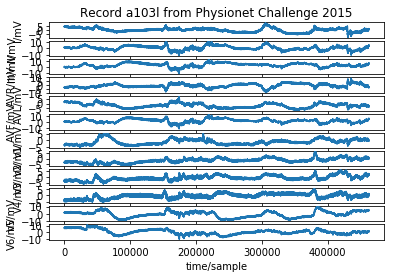

{'adc_gain': [306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0],
 'adc_res': [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
 'adc_zero': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'block_size': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'byte_offset': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'checksum': [-11409,
  21378,
  24619,
  302,
  2125,
  2450,
  -4606,
  30327,
  -27569,
  -13507,
  -4741,
  -28645],
 'comments': ['<age>: 65 <sex>: F <diagnoses> Coronary artery disease, arterial hypertension',
  'patient 1',
  'PVCs, noise'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat'

In [10]:
record = wfdb.rdrecord(base_dir + 'I01') 
wfdb.plot_wfdb(record=record, title='Record a103l from Physionet Challenge 2015') 
display(record.__dict__)

In [9]:
record.adc_res

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]

In [10]:
ann = wfdb.rdann(base_dir + "I01", 'atr')
print(ann.sample)
print(ann.symbol)

[   114    277    442 ... 462068 462243 462416]
['N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'V', 'N', 'V', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'V', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'V', 'N', 'V', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N', '

In [0]:
sig, inf = wfdb = wfdb.rdsamp(base_dir + "I01")

In [12]:
print(sig)
print(inf)

[[ 3.79411765  1.49346405 -0.30392157 ... -4.07189542  1.65359477
   6.44444444]
 [ 3.75816993  1.47712418 -0.28431373 ... -4.05228758  1.66013072
   6.44771242]
 [ 3.76470588  1.49673203 -0.27124183 ... -4.01633987  1.67320261
   6.44771242]
 ...
 [ 0.54901961  4.60784314  6.05555556 ... -0.29084967  4.88562092
   0.61764706]
 [ 0.49673203  4.59150327  6.09150327 ... -0.34313725  4.86928105
   0.57843137]
 [ 0.40849673  4.57189542  6.16013072 ... -0.32679739  4.87581699
   0.54248366]]
{'fs': 257, 'sig_len': 462600, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': ['<age>: 65 <sex>: F <diagnoses> Coronary artery disease, arterial hypertension', 'patient 1', 'PVCs, noise']}
